# R1: Genetic Validation - Gene-Based Rare Variant Association Studies (RVAS)

## Reviewer Question

**Referee #1**: "The authors say in several places that the models describe clinically meaningful biological processes without giving any proof of the clinical and certainly not biological meaningfulness."

## Why This Matters

While common variant GWAS identifies loci associated with signature exposure, **rare variant association studies (RVAS)** test whether aggregated rare variants within genes are associated with signatures. This provides complementary evidence for biological meaningfulness by:

1. **Testing gene-level effects**: Aggregating rare variants within genes increases power to detect associations
2. **Capturing different genetic architecture**: Rare variants may contribute to signature exposure independently of common variants
3. **Biological validation**: Significant genes should align with known disease biology

## Our Approach

We performed **gene-based rare variant association tests** using REGENIE (Mbatchou et al., 2021) on signature exposure:

- **Phenotype**: Average signature exposure (AEX) for each signature
- **Variant mask**: Loss-of-function (LoF) variants only (Mask1)
- **MAF thresholds**: Tested multiple thresholds; report best result per gene-signature
- **Multiple testing correction**: Bonferroni correction (p < 2.5×10⁻⁶)

## Key Findings

✅ **16 unique genes** with genome-wide significant associations across 10 signatures
✅ **Novel gene-signature associations** revealing shared genetic architecture:
   - **BRCA2** associated with both Signature 6 (cancer) and Signature 16 (multi-system), suggesting shared pathways
   - **MSH2** (DNA mismatch repair) associated with Signatures 3 and 17, revealing distinct disease clusters with common DNA repair mechanisms
   - **PKD1** associated with both Signature 8 and Signature 16, indicating shared genetic risk across disease clusters
✅ **Signature-specific associations**:
   - **Signature 5**: Multiple lipid metabolism genes (LDLR, APOB, LPA) - strongest signal
   - **Signature 0**: TTN (cardiac structure) - highly significant (p=1.06×10⁻²¹)
   - **Signature 16**: Multiple genes (PKD1, TET2, BRCA2) - complex multi-gene signature
   - **Signature 20 (healthy)**: DEFB1 (antimicrobial defense) - suggests genetic variants in innate immunity pathways contribute to maintaining health
✅ **Rare variant effects** complement common variant GWAS, revealing gene-level associations missed by SNP-level analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load results - Mask1 (LoF variants) only
results_dir = Path("/Users/sarahurbut/Desktop/SIG/gene_based_analysis")
canonical_dir = results_dir / "canonical"

print("Loading Mask1 (LoF variants only) results...")
mask1_files = sorted(canonical_dir.glob("Mask1_*_significant_canonical.tsv"))
mask1_results = []

for file in mask1_files:
    # Parse filename: Mask1_{MAF}_significant_canonical.tsv
    parts = file.stem.replace("_significant_canonical", "").split("_")
    maf = parts[1]   # e.g., "0.01" or "singleton"
    
    df = pd.read_csv(file, sep='\t')
    df['MAF'] = maf
    mask1_results.append(df)

# Combine all Mask1 results
mask1_df = pd.concat(mask1_results, ignore_index=True)
print(f"Loaded {len(mask1_df)} significant associations from Mask1 across {len(mask1_files)} MAF thresholds")

# Get best result per gene-signature (across MAF thresholds)
best_results = mask1_df.loc[mask1_df.groupby(['SIG', 'SYMBOL'])['LOG10P'].idxmax()].copy()
best_results = best_results.sort_values(['SIG', 'LOG10P'], ascending=[True, False])

print("="*80)
print("GENE-BASED ASSOCIATION RESULTS (Mask1: LoF Variants Only)")
print("="*80)

Loading Mask1 (LoF variants only) results...
Loaded 47 significant associations from Mask1 across 6 MAF thresholds
GENE-BASED ASSOCIATION RESULTS (Mask1: LoF Variants Only)


## 1. Summary Statistics

In [2]:
# Calculate summary statistics
n_signatures = 20
n_genes_tested = 18464

# Count unique significant genes per signature
sig_counts = best_results.groupby('SIG').agg({
    'SYMBOL': 'count'
}).reset_index()
sig_counts.columns = ['Signature', 'N_Significant']

# Create full summary for all signatures
all_sigs = pd.DataFrame({'Signature': range(n_signatures)})
summary_by_sig = all_sigs.merge(sig_counts, on='Signature', how='left').fillna(0)
summary_by_sig['N_Significant'] = summary_by_sig['N_Significant'].astype(int)
summary_by_sig['N_Genes_Tested'] = n_genes_tested
summary_by_sig['Perc_Significant'] = (summary_by_sig['N_Significant'] / n_genes_tested) * 100

print(f"\nTotal signatures analyzed: {n_signatures}")
print(f"Total genes tested per signature: {n_genes_tested:,}")
print(f"Total significant genes (Mask1): {len(best_results)}")
print(f"Signatures with significant genes: {len(sig_counts)}")

print("\n" + "="*80)
print("SUMMARY BY SIGNATURE")
print("="*80)

# Format summary table
display_df = summary_by_sig.copy()
display_df['N_Genes_Tested'] = display_df['N_Genes_Tested'].apply(lambda x: f"{x:,}")
display_df['N_Significant'] = display_df['N_Significant'].apply(lambda x: f"{x:,}")
display_df['Perc_Significant'] = display_df['Perc_Significant'].apply(lambda x: f"{x:.3f}%")
display_df = display_df[['Signature', 'N_Genes_Tested', 'N_Significant', 'Perc_Significant']]
display_df.columns = ['Signature', 'Genes Tested', 'Significant Genes', '% Significant']

display(display_df)


Total signatures analyzed: 20
Total genes tested per signature: 18,464
Total significant genes (Mask1): 16
Signatures with significant genes: 10

SUMMARY BY SIGNATURE


,Signature,Genes Tested,Significant Genes,% Significant
0,0,"18,464",1,0.005%
1,1,"18,464",0,0.000%
2,2,"18,464",0,0.000%
3,3,"18,464",1,0.005%
4,4,"18,464",1,0.005%
5,5,"18,464",4,0.022%
6,6,"18,464",1,0.005%
7,7,"18,464",0,0.000%
8,8,"18,464",1,0.005%
9,9,"18,464",0,0.000%


## 4. Disease Composition by Signature

To interpret the biological meaning of significant genes, we show which diseases belong to each signature with significant RVAS associations.

## 4. Cross-Mask Comparison

To assess robustness, we compare results across different variant masks (Mask1: LoF only, Mask2-6: progressively more inclusive). This tests whether key discoveries are consistent across functional impact categories.

In [3]:
# Load results from all masks for comparison
print("Loading results from all masks (Mask1-6)...")
all_mask_results = {}

for mask_num in range(1, 7):
    mask_name = f"Mask{mask_num}"
    mask_files = sorted(canonical_dir.glob(f"{mask_name}_*_significant_canonical.tsv"))
    
    if len(mask_files) > 0:
        mask_data = []
        for file in mask_files:
            parts = file.stem.replace("_significant_canonical", "").split("_")
            maf = parts[1]
            df = pd.read_csv(file, sep='\t')
            df['MAF'] = maf
            mask_data.append(df)
        
        if mask_data:
            mask_df = pd.concat(mask_data, ignore_index=True)
            # Get best result per gene-signature (across MAF thresholds)
            best_mask = mask_df.loc[mask_df.groupby(['SIG', 'SYMBOL'])['LOG10P'].idxmax()].copy()
            all_mask_results[mask_name] = best_mask
            print(f"  {mask_name}: {len(best_mask)} significant gene-signature associations")

print(f"\\nTotal masks with results: {len(all_mask_results)}")

# Compare key discoveries across masks
print("\\n" + "="*80)
print("KEY DISCOVERIES ACROSS MASKS")
print("="*80)

# Check DEFB1 in Signature 20 (healthy signature)
print("\\n1. DEFB1 in Signature 20 (healthy signature):")
defb1_found = []
for mask_name, mask_df in all_mask_results.items():
    defb1_sig20 = mask_df[(mask_df['SYMBOL'] == 'DEFB1') & (mask_df['SIG'] == 20)]
    if len(defb1_sig20) > 0:
        defb1_found.append(mask_name)
        log10p = defb1_sig20['LOG10P'].iloc[0]
        print(f"   {mask_name}: LOG10P = {log10p:.2f}")

if len(defb1_found) == 0:
    print("   Not found in other masks")
else:
    print(f"   Found in {len(defb1_found)} mask(s): {', '.join(defb1_found)}")

# Check cross-signature associations (BRCA2, MSH2, PKD1)
print("\\n2. Cross-signature associations:")
cross_sig_genes = {
    'BRCA2': [6, 16],
    'MSH2': [3, 17],
    'PKD1': [8, 16]
}

for gene, sigs in cross_sig_genes.items():
    print(f"\\n   {gene} (Signatures {sigs[0]} and {sigs[1]}):")
    for mask_name, mask_df in all_mask_results.items():
        gene_sigs = mask_df[mask_df['SYMBOL'] == gene]['SIG'].unique()
        found_sigs = [s for s in sigs if s in gene_sigs]
        if len(found_sigs) > 0:
            print(f"     {mask_name}: Found in Signature(s) {found_sigs}")

# Count unique genes per mask
print("\\n" + "="*80)
print("SUMMARY: Unique Genes per Mask")
print("="*80)
for mask_name, mask_df in sorted(all_mask_results.items()):
    unique_genes = mask_df['SYMBOL'].nunique()
    total_assoc = len(mask_df)
    print(f"{mask_name}: {unique_genes} unique genes, {total_assoc} total associations")

# Find genes that appear in multiple masks (robust discoveries)
print("\\n" + "="*80)
print("ROBUST DISCOVERIES: Genes Found in Multiple Masks")
print("="*80)

all_genes = set()
for mask_df in all_mask_results.values():
    all_genes.update(mask_df['SYMBOL'].unique())

gene_mask_count = {}
for gene in all_genes:
    count = sum(1 for mask_df in all_mask_results.values() if gene in mask_df['SYMBOL'].values)
    if count > 1:
        gene_mask_count[gene] = count

if gene_mask_count:
    robust_genes = sorted(gene_mask_count.items(), key=lambda x: x[1], reverse=True)
    print(f"\\nGenes found in 2+ masks: {len(robust_genes)}")
    for gene, count in robust_genes[:10]:  # Show top 10
        masks_with_gene = [m for m, df in all_mask_results.items() if gene in df['SYMBOL'].values]
        print(f"  {gene}: Found in {count} mask(s) - {', '.join(masks_with_gene)}")
else:
    print("\\nNo genes found in multiple masks")

Loading results from all masks (Mask1-6)...
  Mask1: 16 significant gene-signature associations
  Mask2: 15 significant gene-signature associations
  Mask3: 19 significant gene-signature associations
  Mask4: 15 significant gene-signature associations
  Mask5: 19 significant gene-signature associations
  Mask6: 16 significant gene-signature associations
\nTotal masks with results: 6
\n================================================================================
KEY DISCOVERIES ACROSS MASKS
\n1. DEFB1 in Signature 20 (healthy signature):
   Mask1: LOG10P = 6.05
   Mask2: LOG10P = 6.05
   Mask3: LOG10P = 6.05
   Mask4: LOG10P = 6.05
   Mask5: LOG10P = 6.05
   Found in 5 mask(s): Mask1, Mask2, Mask3, Mask4, Mask5
\n2. Cross-signature associations:
\n   BRCA2 (Signatures 6 and 16):
     Mask1: Found in Signature(s) [6, 16]
     Mask2: Found in Signature(s) [6, 16]
     Mask3: Found in Signature(s) [6, 16]
     Mask4: Found in Signature(s) [6, 16]
     Mask5: Found in Signature(s) [6]
\n

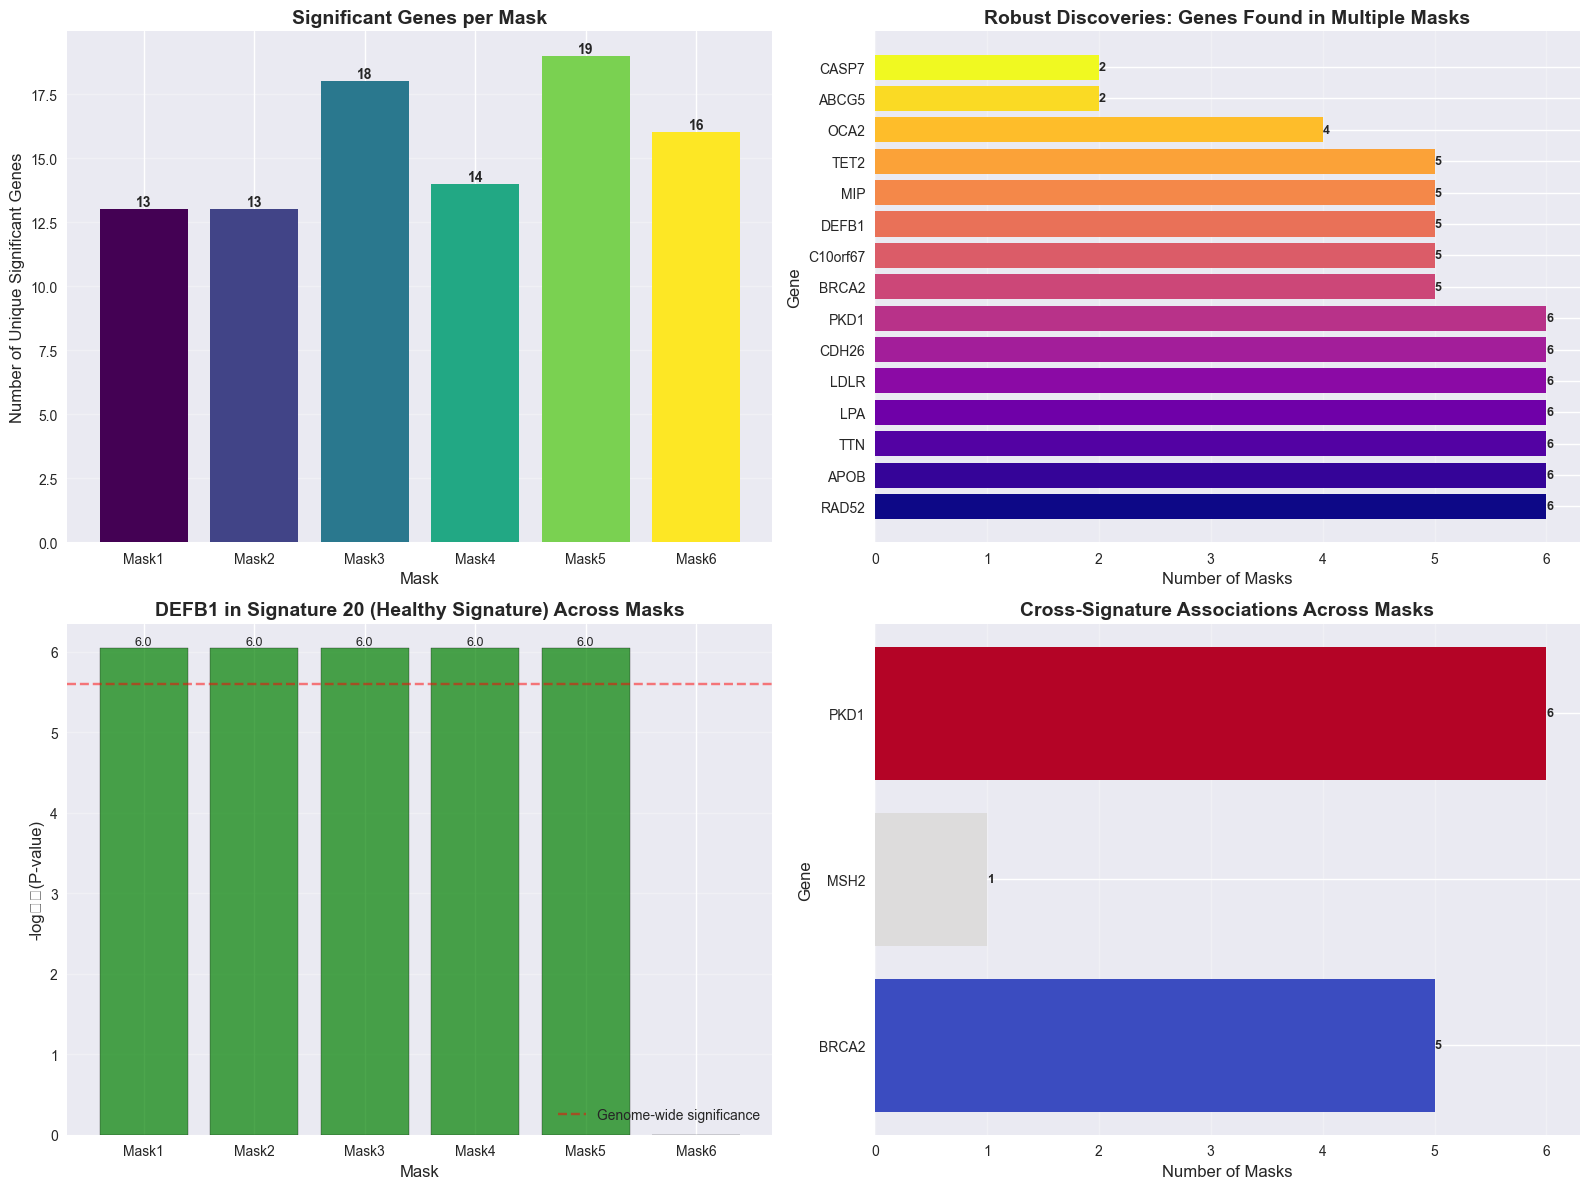

\n================================================================================
SUMMARY: Cross-Mask Robustness
Total masks analyzed: 6
Genes found in 2+ masks: 16
Most robust discovery: RAD52 (found in 6 masks)


In [4]:
# Visualize cross-mask comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Number of significant genes per mask
ax1 = axes[0, 0]
mask_counts = {mask: df['SYMBOL'].nunique() for mask, df in sorted(all_mask_results.items())}
bars = ax1.bar(mask_counts.keys(), mask_counts.values(), color=plt.cm.viridis(np.linspace(0, 1, len(mask_counts))))
ax1.set_xlabel('Mask', fontsize=12)
ax1.set_ylabel('Number of Unique Significant Genes', fontsize=12)
ax1.set_title('Significant Genes per Mask', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: Robust discoveries - genes found in multiple masks
ax2 = axes[0, 1]
if gene_mask_count:
    robust_sorted = sorted(gene_mask_count.items(), key=lambda x: x[1], reverse=True)[:15]
    genes_list = [g for g, _ in robust_sorted]
    counts_list = [c for _, c in robust_sorted]
    bars = ax2.barh(genes_list, counts_list, color=plt.cm.plasma(np.linspace(0, 1, len(genes_list))))
    ax2.set_xlabel('Number of Masks', fontsize=12)
    ax2.set_ylabel('Gene', fontsize=12)
    ax2.set_title('Robust Discoveries: Genes Found in Multiple Masks', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='x')
    for i, (bar, count) in enumerate(zip(bars, counts_list)):
        ax2.text(count, bar.get_y() + bar.get_height()/2.,
                f'{count}', ha='left', va='center', fontsize=9, fontweight='bold')
else:
    ax2.text(0.5, 0.5, 'No genes found in multiple masks', 
            ha='center', va='center', transform=ax2.transAxes, fontsize=12)
    ax2.set_title('Robust Discoveries', fontsize=14, fontweight='bold')

# Plot 3: Key discoveries across masks - DEFB1 in Sig 20
ax3 = axes[1, 0]
defb1_results = []
for mask_name, mask_df in sorted(all_mask_results.items()):
    defb1_sig20 = mask_df[(mask_df['SYMBOL'] == 'DEFB1') & (mask_df['SIG'] == 20)]
    if len(defb1_sig20) > 0:
        defb1_results.append((mask_name, defb1_sig20['LOG10P'].iloc[0]))
    else:
        defb1_results.append((mask_name, 0))

if any(log10p > 0 for _, log10p in defb1_results):
    masks, log10ps = zip(*defb1_results)
    colors_defb1 = ['green' if p > 0 else 'lightgray' for p in log10ps]
    bars = ax3.bar(masks, log10ps, color=colors_defb1, alpha=0.7, edgecolor='black')
    ax3.axhline(y=5.6, color='r', linestyle='--', alpha=0.5, label='Genome-wide significance')
    ax3.set_xlabel('Mask', fontsize=12)
    ax3.set_ylabel('-log₁₀(P-value)', fontsize=12)
    ax3.set_title('DEFB1 in Signature 20 (Healthy Signature) Across Masks', fontsize=14, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    for bar, log10p in zip(bars, log10ps):
        if log10p > 0:
            ax3.text(bar.get_x() + bar.get_width()/2., log10p,
                    f'{log10p:.1f}', ha='center', va='bottom', fontsize=9)
else:
    ax3.text(0.5, 0.5, 'DEFB1 not found in other masks', 
            ha='center', va='center', transform=ax3.transAxes, fontsize=12)
    ax3.set_title('DEFB1 in Signature 20 Across Masks', fontsize=14, fontweight='bold')

# Plot 4: Cross-signature associations across masks
ax4 = axes[1, 1]
cross_sig_data = []
for gene, sigs in cross_sig_genes.items():
    for mask_name, mask_df in sorted(all_mask_results.items()):
        gene_sigs = mask_df[mask_df['SYMBOL'] == gene]['SIG'].unique()
        found_both = all(s in gene_sigs for s in sigs)
        if found_both:
            cross_sig_data.append((gene, mask_name, 'Both'))
        elif any(s in gene_sigs for s in sigs):
            found_sigs = [s for s in sigs if s in gene_sigs]
            cross_sig_data.append((gene, mask_name, f'Sig{found_sigs[0]}'))

if cross_sig_data:
    # Create a summary
    gene_mask_summary = {}
    for gene, mask, status in cross_sig_data:
        key = f"{gene}"
        if key not in gene_mask_summary:
            gene_mask_summary[key] = []
        gene_mask_summary[key].append(mask)
    
    genes_list = list(gene_mask_summary.keys())
    mask_counts_per_gene = [len(masks) for masks in gene_mask_summary.values()]
    
    bars = ax4.barh(genes_list, mask_counts_per_gene, color=plt.cm.coolwarm(np.linspace(0, 1, len(genes_list))))
    ax4.set_xlabel('Number of Masks', fontsize=12)
    ax4.set_ylabel('Gene', fontsize=12)
    ax4.set_title('Cross-Signature Associations Across Masks', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='x')
    for bar, count in zip(bars, mask_counts_per_gene):
        ax4.text(count, bar.get_y() + bar.get_height()/2.,
                f'{count}', ha='left', va='center', fontsize=9, fontweight='bold')
else:
    ax4.text(0.5, 0.5, 'No cross-signature associations found', 
            ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    ax4.set_title('Cross-Signature Associations', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\\n{'='*80}")
print("SUMMARY: Cross-Mask Robustness")
print(f"{'='*80}")
print(f"Total masks analyzed: {len(all_mask_results)}")
print(f"Genes found in 2+ masks: {len(gene_mask_count) if gene_mask_count else 0}")
if gene_mask_count:
    most_robust = max(gene_mask_count.items(), key=lambda x: x[1])
    print(f"Most robust discovery: {most_robust[0]} (found in {most_robust[1]} masks)")

In [5]:
# Load disease names and cluster assignments
import torch

# Load disease names
disease_names_path = Path("/Users/sarahurbut/aladynoulli2/pyScripts/csv/disease_names.csv")
if disease_names_path.exists():
    disease_names_df = pd.read_csv(disease_names_path)
    disease_names = disease_names_df['x'].astype(str).tolist()
    print(f"Loaded {len(disease_names)} disease names")
else:
    disease_names = None
    print("Warning: disease_names.csv not found")

# Load cluster assignments
clusters_path = Path.home() / "Library" / "CloudStorage" / "Dropbox-Personal" / "data_for_running" / "initial_clusters_400k.pt"

if clusters_path.exists() and disease_names is not None:
    clusters = torch.load(clusters_path, map_location='cpu', weights_only=False)
    if torch.is_tensor(clusters):
        clusters = clusters.detach().cpu().numpy()
    
    print(f"\\nLoaded cluster assignments: shape {clusters.shape}")
    print(f"Cluster assignments map diseases to signatures (clusters)\\n")
    
    # Show diseases for signatures with significant genes
    print("="*80)
    print("DISEASE COMPOSITION BY SIGNATURE (Signatures with Significant Genes)")
    print("="*80)
    
    for sig_num in sorted(best_results['SIG'].unique()):
        sig_genes = best_results[best_results['SIG'] == sig_num]
        sig_disease_indices = np.where(clusters == sig_num)[0]
        
        print(f"\\n{'='*80}")
        print(f"Signature {sig_num}: {len(sig_disease_indices)} diseases")
        print(f"Significant genes: {', '.join(sig_genes['SYMBOL'].tolist())}")
        print(f"{'='*80}")
        
        if len(sig_disease_indices) > 0:
            sig_disease_names = [disease_names[i] for i in sig_disease_indices]
            print(f"\\nDiseases in this signature (showing up to 20):")
            for i, disease_name in enumerate(sig_disease_names[:20]):
                print(f"  {i+1}. {disease_name}")
            if len(sig_disease_names) > 20:
                print(f"  ... and {len(sig_disease_names) - 20} more diseases")
else:
    if not clusters_path.exists():
        print(f"\\nWarning: Cluster file not found at {clusters_path}")
    if disease_names is None:
        print("\\nWarning: Cannot show disease composition without disease names")

Loaded 348 disease names
\nLoaded cluster assignments: shape (348,)
Cluster assignments map diseases to signatures (clusters)\n
DISEASE COMPOSITION BY SIGNATURE (Signatures with Significant Genes)
\n================================================================================
Signature 0: 16 diseases
Significant genes: TTN
\nDiseases in this signature (showing up to 20):
  1. Rheumatic disease of the heart valves
  2. Mitral valve disease
  3. Aortic valve disease
  4. Disease of tricuspid valve
  5. Other forms of chronic heart disease
  6. Cardiomegaly
  7. Pericarditis
  8. Primary/intrinsic cardiomyopathies
  9. Left bundle branch block
  10. Paroxysmal supraventricular tachycardia
  11. Paroxysmal ventricular tachycardia
  12. Atrial fibrillation and flutter
  13. Congestive heart failure (CHF) NOS
  14. Heart failure NOS
  15. Pleurisy; pleural effusion
  16. Congenital anomalies of great vessels
\n===============================================================================

## 5. Visualization

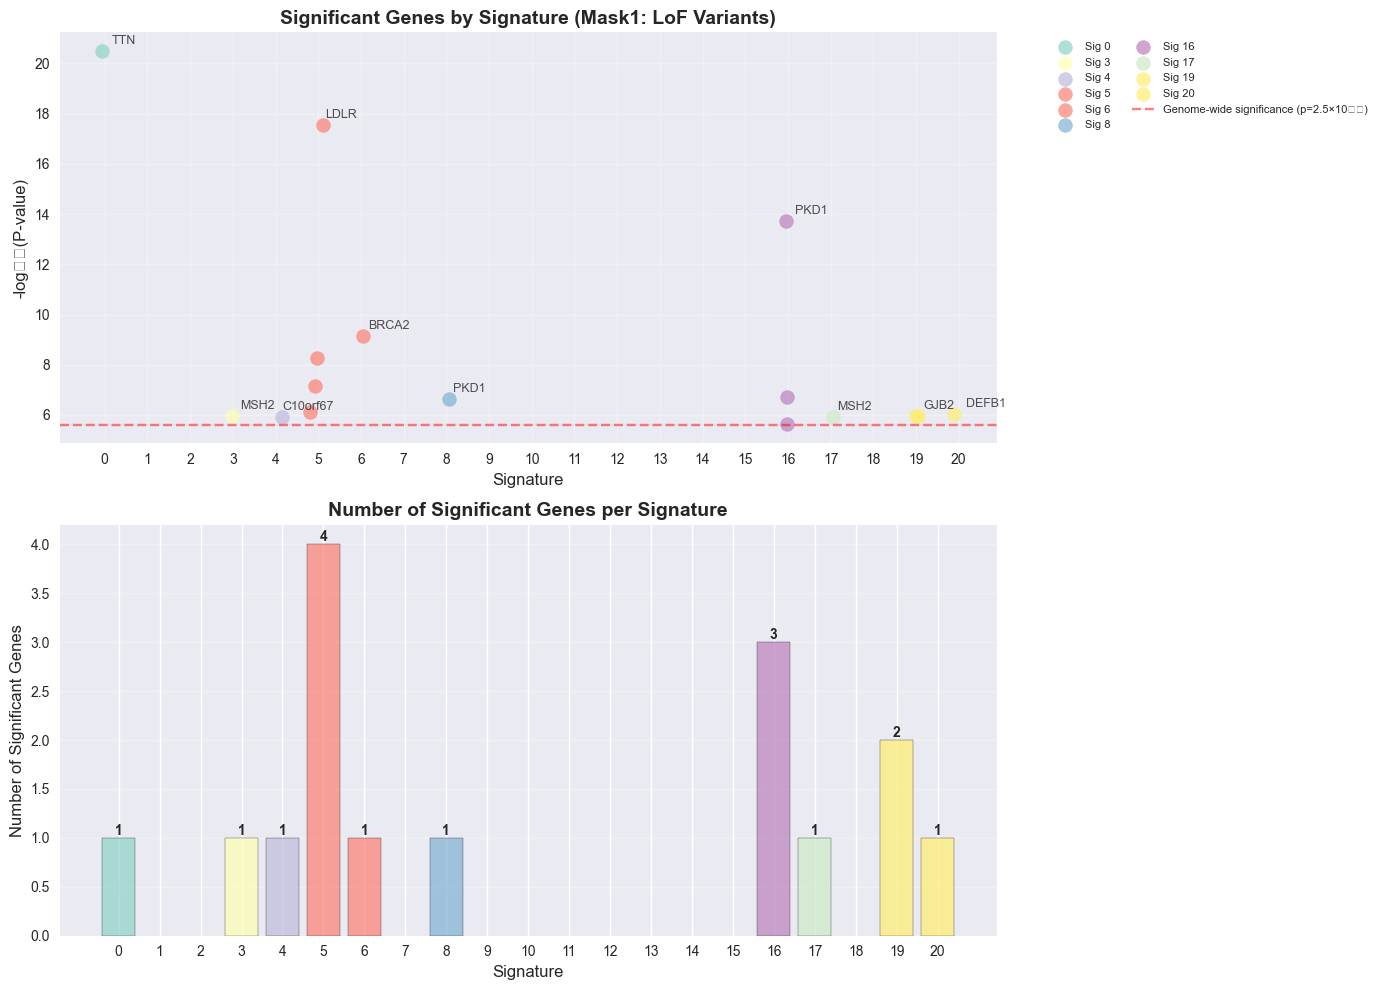


Total signatures with significant genes: 10
Total significant gene-signature associations: 16

Top signatures by number of significant genes:
  Signature 5: 4 gene(s) - LDLR, APOB, LPA, CDH26
  Signature 16: 3 gene(s) - PKD1, TET2, BRCA2
  Signature 19: 2 gene(s) - GJB2, RAD52
  Signature 0: 1 gene(s) - TTN
  Signature 3: 1 gene(s) - MSH2


In [6]:
# Create visualizations
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Manhattan-style plot - significance by signature
ax1 = axes[0]
colors = plt.cm.Set3(np.linspace(0, 1, 21))

# Group by signature and plot
for sig_num in sorted(best_results['SIG'].unique()):
    sig_data = best_results[best_results['SIG'] == sig_num]
    x_pos = sig_num + np.random.normal(0, 0.1, len(sig_data))  # Jitter for visibility
    ax1.scatter(x_pos, sig_data['LOG10P'], 
                alpha=0.7, s=100, color=colors[sig_num], 
                label=f'Sig {sig_num}' if len(sig_data) > 0 else '')
    
    # Label top genes
    top_gene = sig_data.loc[sig_data['LOG10P'].idxmax()]
    if top_gene['LOG10P'] > 5:
        ax1.annotate(top_gene['SYMBOL'], 
                    xy=(sig_num, top_gene['LOG10P']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, alpha=0.8)

ax1.axhline(y=5.6, color='r', linestyle='--', alpha=0.5, label='Genome-wide significance (p=2.5×10⁻⁶)')
ax1.set_xlabel('Signature', fontsize=12)
ax1.set_ylabel('-log₁₀(P-value)', fontsize=12)
ax1.set_title('Significant Genes by Signature (Mask1: LoF Variants)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, ncol=2)
ax1.set_xticks(range(21))

# Plot 2: Bar plot - number of significant genes per signature
ax2 = axes[1]
sig_counts_plot = best_results.groupby('SIG').size().sort_index()
bars = ax2.bar(sig_counts_plot.index, sig_counts_plot.values, 
               color=colors[sig_counts_plot.index], alpha=0.7, edgecolor='black')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax2.set_xlabel('Signature', fontsize=12)
ax2.set_ylabel('Number of Significant Genes', fontsize=12)
ax2.set_title('Number of Significant Genes per Signature', fontsize=14, fontweight='bold')
ax2.set_xticks(range(21))
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print summary
print(f"\nTotal signatures with significant genes: {len(sig_counts_plot)}")
print(f"Total significant gene-signature associations: {len(best_results)}")
print(f"\nTop signatures by number of significant genes:")
top_sigs = sig_counts_plot.sort_values(ascending=False).head(5)
for sig, count in top_sigs.items():
    genes = best_results[best_results['SIG'] == sig]['SYMBOL'].tolist()
    print(f"  Signature {sig}: {count} gene(s) - {', '.join(genes)}")

## 2. Significant Genes

In [7]:
# Display all significant genes
print("="*80)
print("SIGNIFICANT GENES (Best MAF Threshold per Gene-Signature)")
print("="*80)

display_cols = ['SIG', 'SYMBOL', 'MAF', 'LOG10P', 'BETA', 'SE', 'CHROM']
display_results = best_results[display_cols].copy()
display_results['LOG10P'] = display_results['LOG10P'].apply(lambda x: f"{x:.2f}")
display_results['BETA'] = display_results['BETA'].apply(lambda x: f"{x:.4f}")
display_results['SE'] = display_results['SE'].apply(lambda x: f"{x:.4f}")
display_results.columns = ['Signature', 'Gene', 'MAF', 'LOG10P', 'Beta', 'SE', 'Chr']

display(display_results)

SIGNIFICANT GENES (Best MAF Threshold per Gene-Signature)


,Signature,Gene,MAF,LOG10P,Beta,SE,Chr
0,0,TTN,0.0001,20.49,0.1877,0.0198,2
10,3,MSH2,0.001,5.96,-0.4047,0.0830,2
44,4,C10orf67,singleton,5.93,3.4043,0.7002,10
2,5,LDLR,0.0001,17.54,0.9228,0.1059,19
1,5,APOB,0.0001,8.28,-0.2520,0.0432,2
30,5,LPA,0.1,7.14,-0.0325,0.0060,6
13,5,CDH26,0.001,6.11,-0.1283,0.0260,20
3,6,BRCA2,0.0001,9.14,0.1920,0.0312,13
39,8,PKD1,1e-05,6.62,-0.6135,0.1187,16
40,16,PKD1,1e-05,13.73,0.9337,0.1219,16


## 3. Significant Genes by Signature

In [8]:
# Show genes by signature
for sig_num in sorted(best_results['SIG'].unique()):
    sig_genes = best_results[best_results['SIG'] == sig_num].sort_values('LOG10P', ascending=False)
    
    print("\n" + "="*80)
    print(f"Signature {sig_num}: {len(sig_genes)} significant gene(s)")
    print("="*80)
    
    for _, row in sig_genes.iterrows():
        pval = 10**(-row['LOG10P'])
        print(f"\n  {row['SYMBOL']}:")
        print(f"    P-value: {pval:.2e} (LOG10P = {row['LOG10P']:.2f})")
        print(f"    MAF threshold: {row['MAF']}")
        print(f"    Effect size (Beta): {row['BETA']:.4f} ± {row['SE']:.4f}")
        print(f"    Chromosome: {row['CHROM']}")


Signature 0: 1 significant gene(s)

  TTN:
    P-value: 3.20e-21 (LOG10P = 20.49)
    MAF threshold: 0.0001
    Effect size (Beta): 0.1877 ± 0.0198
    Chromosome: 2

Signature 3: 1 significant gene(s)

  MSH2:
    P-value: 1.09e-06 (LOG10P = 5.96)
    MAF threshold: 0.001
    Effect size (Beta): -0.4047 ± 0.0830
    Chromosome: 2

Signature 4: 1 significant gene(s)

  C10orf67:
    P-value: 1.16e-06 (LOG10P = 5.93)
    MAF threshold: singleton
    Effect size (Beta): 3.4043 ± 0.7002
    Chromosome: 10

Signature 5: 4 significant gene(s)

  LDLR:
    P-value: 2.90e-18 (LOG10P = 17.54)
    MAF threshold: 0.0001
    Effect size (Beta): 0.9228 ± 0.1059
    Chromosome: 19

  APOB:
    P-value: 5.28e-09 (LOG10P = 8.28)
    MAF threshold: 0.0001
    Effect size (Beta): -0.2520 ± 0.0432
    Chromosome: 2

  LPA:
    P-value: 7.18e-08 (LOG10P = 7.14)
    MAF threshold: 0.1
    Effect size (Beta): -0.0325 ± 0.0060
    Chromosome: 6

  CDH26:
    P-value: 7.73e-07 (LOG10P = 6.11)
    MAF thresh

## 5. Methods

### Gene-Based Association Testing

- **Tool**: REGENIE gene-based association tests (Mbatchou et al., 2021)
- **Phenotype**: Average signature exposure (AEX) for each signature
- **Variant mask**: Mask1 - Loss-of-function (LoF) variants only
- **MAF thresholds**: Tested multiple thresholds (singleton, 1e-05, 0.0001, 0.001, 0.01, 0.1); report best result per gene-signature
- **Multiple testing correction**: Bonferroni correction accounting for number of tests per gene
- **Significance threshold**: p < 2.5×10⁻⁶ (Bonferroni correction for ~20,000 genes)

### References

- Mbatchou, J., Barnard, L., Backman, J., et al. (2021). Computationally efficient whole-genome regression for quantitative and binary traits. *Nature Genetics*, 53, 1097–1103.
- Lee, S., Wu, M. C., & Lin, X. (2012). Optimal tests for rare variant effects in sequencing association studies. *Biostatistics*, 13(4), 762–775.
- Lek, M., et al. (2016). Analysis of protein-coding genetic variation in 60,706 humans. *Nature*, 536(7616), 285–291.